In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
# import dataset
dataset = pd.read_csv('Mall_Customers.csv')
x = dataset.iloc[:, [3, 4]].values

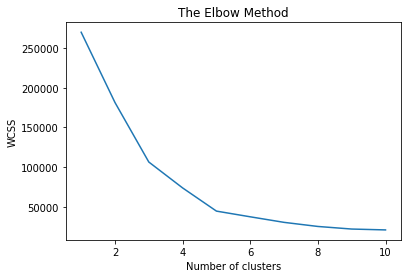

In [16]:
# using elbow method
from sklearn.cluster import KMeans
wcss = []
for number in range(1, 11):
    kmeans = KMeans(n_clusters = number, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [20]:
# Applying k-means to the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

array([[88.2       , 17.11428571],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348]])

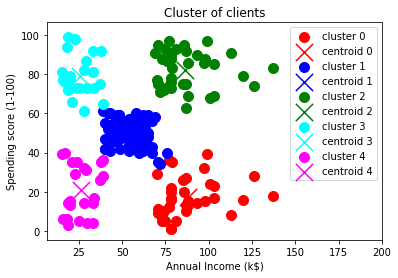

In [31]:
# Visualising the clusters
colorsList = ['red', 'blue', 'green', 'cyan', 'magenta']
for number in range(5):
    plt.scatter(x[y_kmeans == number, 0], x[y_kmeans == number, 1], s = 100,
    c = colorsList[number], label = 'cluster {}'.format(number))
    plt.scatter(kmeans.cluster_centers_[number, 0], kmeans.cluster_centers_[number, 1], marker = 'x',
    s = 300, c = colorsList[number], label = 'centroid {}'.format(number))
plt.title('Cluster of clients')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending score (1-100)')
plt.xlim(xmax = 200)
plt.legend()
plt.show()